In [184]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [113]:
imb_19 = pd.read_csv('../data/imbalance_1h_2019.csv')
imb_19

,timestamp,imbalance_price
0,2019-01-01 00:00:00,-329.604500
1,2019-01-01 01:00:00,-283.800000
2,2019-01-01 02:00:00,-334.717000
3,2019-01-01 03:00:00,117.666500
4,2019-01-01 04:00:00,-323.315000
...,...,...
20419,2021-04-30 19:00:00,-11.115500
20420,2021-04-30 20:00:00,293.269000
20421,2021-04-30 21:00:00,190.205000
20422,2021-04-30 22:00:00,147.016714


In [114]:
# renaming columns
imb_19 = imb_19.rename(columns={'timestamp': 'ds', 'imbalance_price': 'y'})

In [115]:
# split
def train_test_split(df):
    n = int(len(df)*0.7)
    train, test = df.iloc[:n], df.iloc[n:]

    return train,test

In [116]:
train_19, test_19 = train_test_split(imb_19)
train_19.shape

(14296, 2)

In [117]:
test_19.shape

(6128, 2)

### Parameters
1) growth
2) changepoints
3) changepoint_range
4) changepoint_prior_scale
5) fourier_order

In [166]:
# model instantiation
m = Prophet(
    growth="linear", 
    changepoint_prior_scale=200, 
    seasonality_prior_scale=50,
    daily_seasonality=35,
    weekly_seasonality=60,
    yearly_seasonality=40
    )

In [167]:
m.fit(train_19)

Initial log joint probability = -158.089
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       22015.7      0.154285       1222.22           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       22026.2    0.00735936       318.578           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       22040.8   0.000459255       349.342      0.7314      0.7314      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       22047.6    0.00449538       216.802           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       22050.2     0.0491071       352.975           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [169]:
# periods of timesteps in dataframe or periods of forecast?!
future = m.make_future_dataframe(periods=1, freq='H')
future.shape

(14297, 1)

In [170]:
future

,ds
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00
...,...
14292,2020-08-18 12:00:00
14293,2020-08-18 13:00:00
14294,2020-08-18 14:00:00
14295,2020-08-18 15:00:00


In [171]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14292,2020-08-18 12:00:00,202.181595,-378.291421,781.001043
14293,2020-08-18 13:00:00,226.808972,-348.280597,820.654918
14294,2020-08-18 14:00:00,216.851058,-342.699838,825.334362
14295,2020-08-18 15:00:00,194.652170,-381.127325,780.430275
14296,2020-08-18 16:00:00,214.612543,-376.743544,776.487034


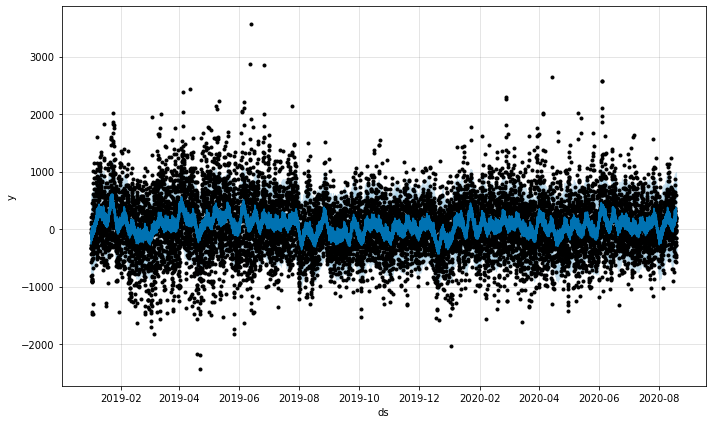

In [172]:
forecast_19 = m.plot(forecast)

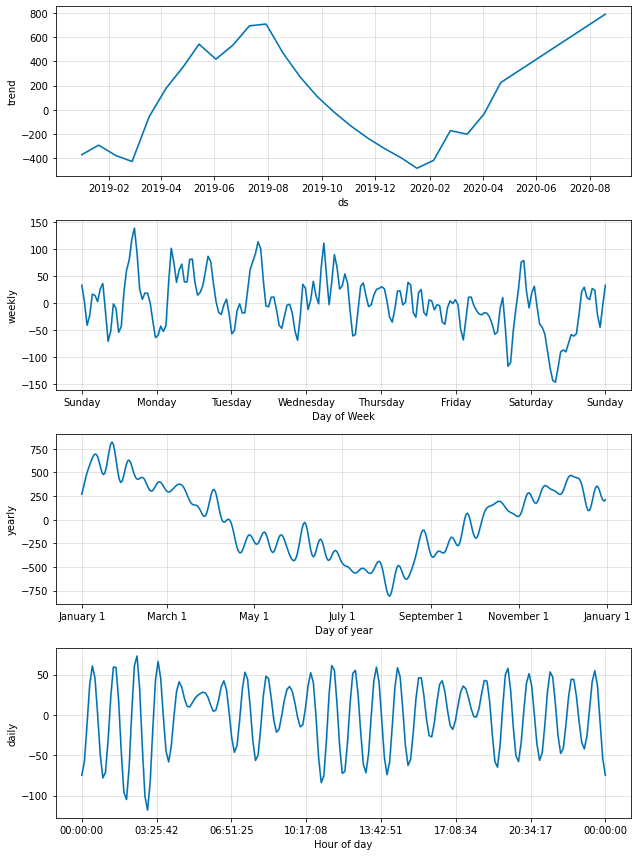

In [173]:
model_components_19 = m.plot_components(forecast)

In [183]:
# cv_19_results = cross_validation(Prophet, ) 
cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

AttributeError: type object 'Prophet' has no attribute 'history'

In [ ]:
# rmse = mean_squared_error(y_true, y_pred , squared=False)
# rmse